In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns  # running 0.10.1

from sklearn import preprocessing

Read data:

In [2]:
data = pd.read_csv(os.getcwd() + '/Data/brain_tumour.csv')
data.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


* Mean : contribution of individual pixel intensity for the entire image
* Variance : how each pixel varies from the neighbouring pixel
* Standard Deviation : deviation of measured values
* Skewness : measures of symmetry, or more precisely, the lack of symmetry.
* Kurtosis : describes the peakedness of e.g. a frequency distribution
* Contrast : difference in luminance or colour across the image
* Energy : rate of change in the color/brightness/magnitude of the pixels over local areas.
* ASM (Angular Second Moment) : textural uniformity of an image
* Entropy : statistical measure of randomness that can be used to characterize the texture of the image
* Homogeneity : how similar certain pixels of the image are.
* Dissimilarity : numerical measure of how different two data objects are.
* Correlation : moving a filter mask (often referred to as kernel) over the image and computing the sum of products at each location
* Coarseness : roughness/harshness of a texture

* Class:
    * Class 0: Not a tumour

    * Class 1: Brain tumour

Label distro:

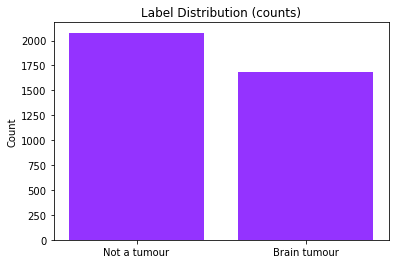

In [3]:
class_distro = data['Class'].value_counts()

plt.bar(['Not a tumour', 'Brain tumour'], class_distro, color = '#9433ff')
plt.title('Label Distribution (counts)')
plt.ylabel('Count')
plt.show()
plt.close()

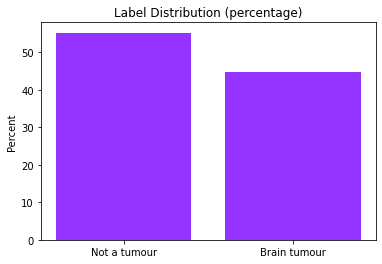

In [4]:
plt.bar(['Not a tumour', 'Brain tumour'], (class_distro / data.shape[0]) * 100, color = '#9433ff')
plt.title('Label Distribution (percentage)')
plt.ylabel('Percent')
plt.show()
plt.close()

Data distro:

In [5]:
def dataDistro(data, log_distro):
    i = 0

    for col in data: 
        if log_distro[i]:  # apply log scale
            plt.hist(data[col], log = True, color = '#9433ff')
            plt.ylabel('Log Count')
        else:
            plt.hist(data[col], color = '#9433ff')
            plt.ylabel('Count')
        plt.title('Data column: ' + col + ' Distribution')
        plt.xlabel(col)
        plt.show()
        plt.close()

        i += 1

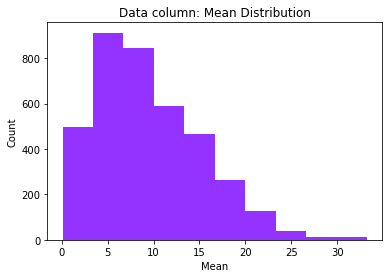

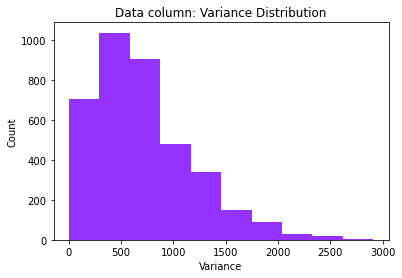

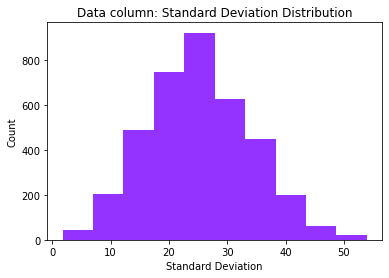

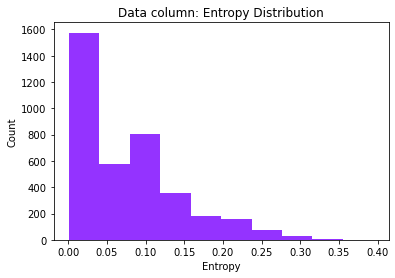

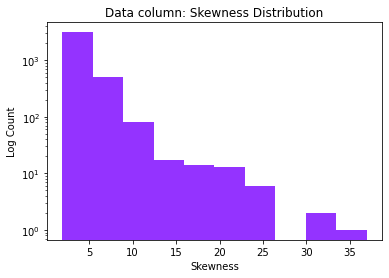

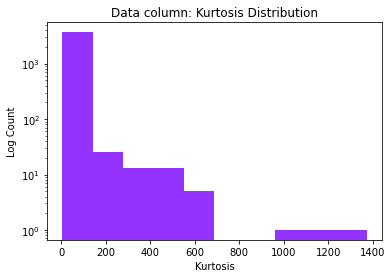

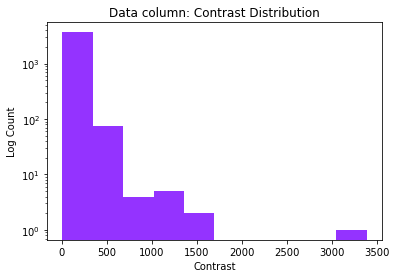

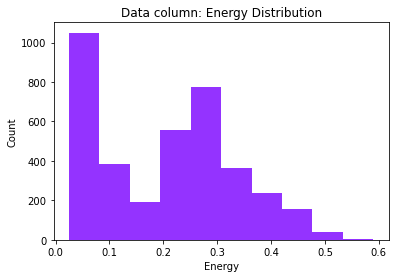

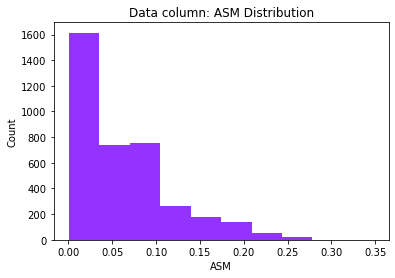

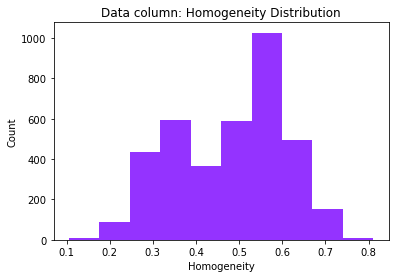

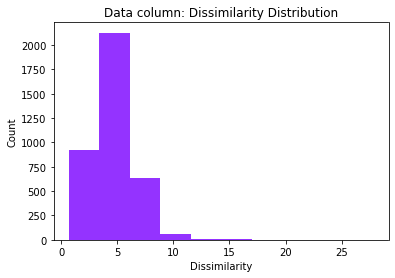

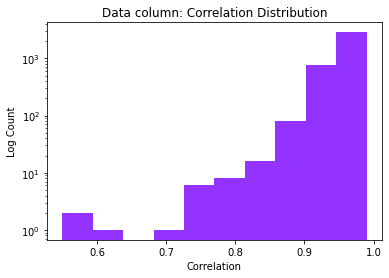

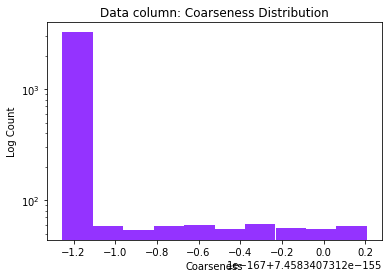

In [6]:
log_distro = [False, False, False, False, True, True, True, False, False, False, False, True, True]
# for i in range(len(data.columns[2 :])):
#     print(data.columns[2 :][i], log_distro[i])

dataDistro(data[data.columns[2 :]], log_distro)  # data distro before normalising, skip image and class columns

In [7]:
data.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


Normalise data:

In [14]:
# normalise using min-max normalisation
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(data[data.columns[2 :]].values)
normal_data = pd.DataFrame(scaled_data, columns = data.columns[2 :])
# normal_data['Image'] = data['Image']
normal_data.insert(loc = 0, column = 'Image', value = data["Image"])
normal_data['Class'] = data['Class']
normal_data.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
0,Image1,0.194705,0.212023,0.443074,0.274801,0.068211,0.010937,0.028236,0.475410,0.246092,0.603108,0.139694,0.981764,0.0,0
1,Image2,0.261489,0.276124,0.510114,0.674843,0.052278,0.007693,0.017951,0.797096,0.648383,0.773800,0.093527,0.997417,0.0,0
2,Image3,0.219003,0.392326,0.614200,0.001487,0.090618,0.016478,0.023280,0.012719,0.001173,0.230760,0.195261,0.972855,0.0,1
3,Image4,0.177300,0.329007,0.559750,0.001513,0.108202,0.021559,0.043805,0.012908,0.001192,0.196137,0.258588,0.941475,0.0,1
4,Image5,0.218223,0.249840,0.483677,0.370574,0.068403,0.011067,0.050836,0.564860,0.338854,0.560862,0.226679,0.960995,0.0,0


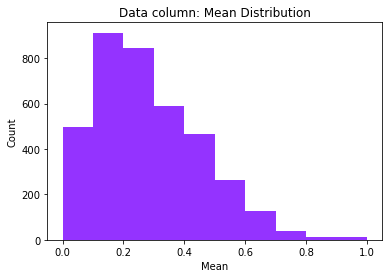

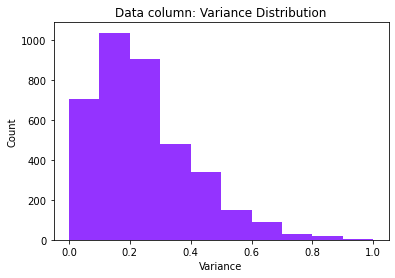

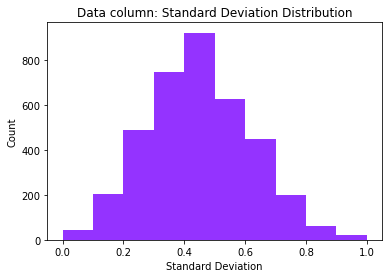

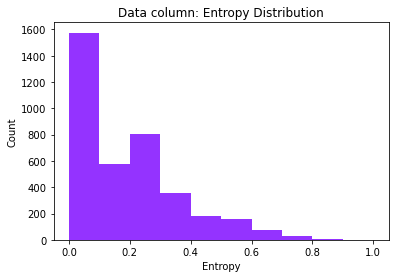

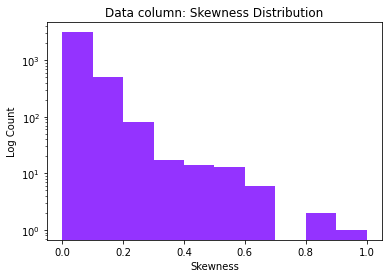

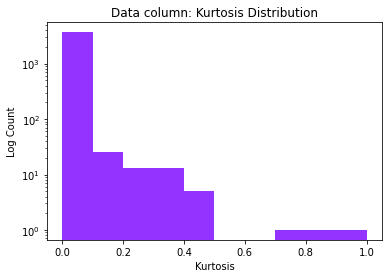

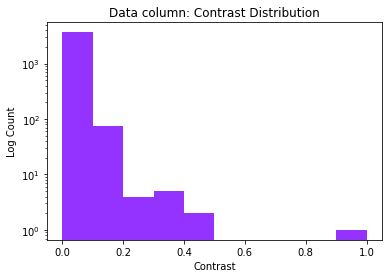

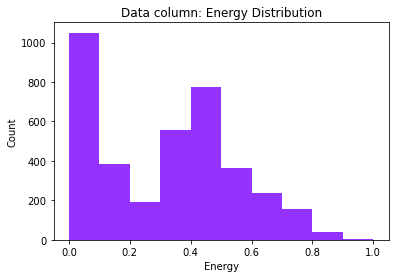

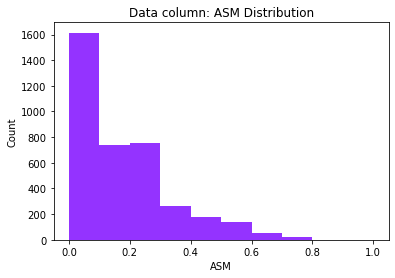

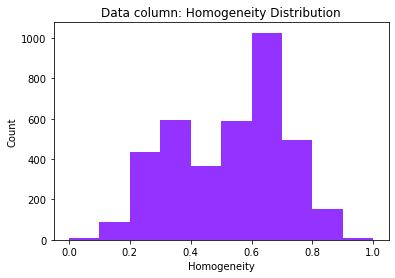

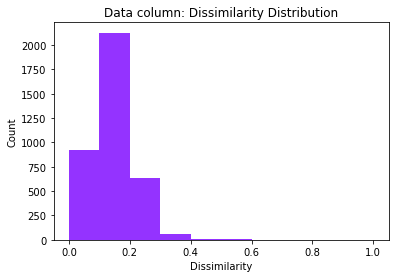

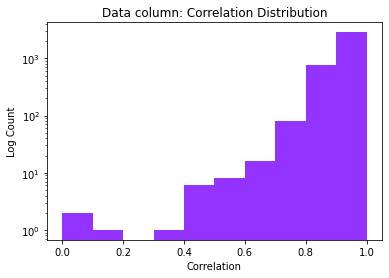

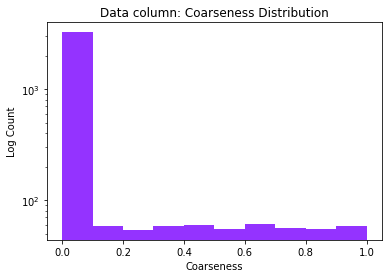

In [23]:
log_distro = [False, False, False, False, True, True, True, False, False, False, False, True, True]
# for i in range(len(data.columns[2 :])):
#     print(data.columns[2 :][i], log_distro[i])

dataDistro(normal_data[normal_data.columns[1: 14]], log_distro)  # data distro after normalising, skip image and class columns

In [18]:
normal_data.describe()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000
mean,0.283771,0.243498,0.448647,0.184732,0.063253,0.014950,0.036920,0.318566,0.167150,0.529835,0.147988,0.922356,0.076254,0.447368
std,0.172732,0.160783,0.168152,0.178502,0.073075,0.041263,0.032402,0.228961,0.167958,0.181349,0.068155,0.059374,0.212021,0.497288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.147875,0.123848,0.331279,0.015178,0.020950,0.002420,0.020397,0.079452,0.012201,0.367836,0.100611,0.902770,0.000000,0.000000
50%,0.253273,0.213052,0.444225,0.167015,0.043835,0.006154,0.030640,0.355368,0.144728,0.577039,0.140028,0.935620,0.000000,0.000000
75%,0.396066,0.331498,0.561986,0.285535,0.078919,0.013671,0.046714,0.485299,0.255624,0.666354,0.185758,0.957740,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Correlation matrix:

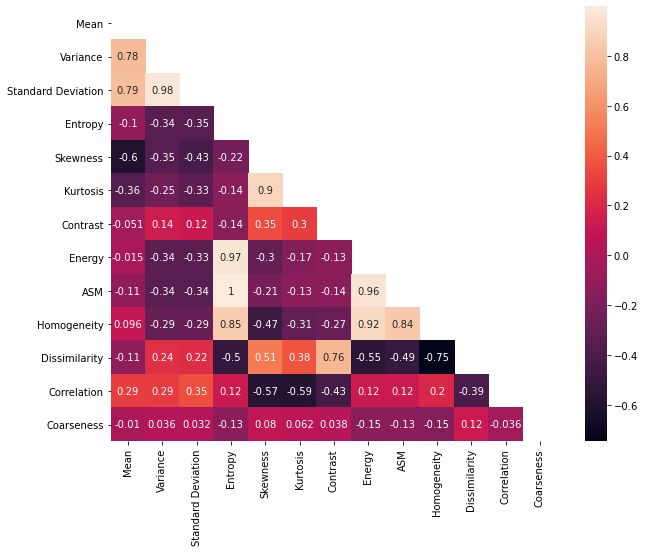

In [24]:
corr_matrix = normal_data[normal_data.columns[1 : 14]].corr()  # get correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))  # upper triangle mask

# plot
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, mask = mask, annot = True)
plt.show()
plt.close()

Notes: 

1. Kurtosis and skewness corr is 0.9

2. ASM and entropy corr is 1

3. Coarseness corr with every other feature is slow

Data distro by class:

In [27]:
def dataDistroByClass(data):    
#     for col in data.columns[: 13]:
    for col in data.columns[2 : 14]:  # Coarseness has std dev = 0, hence no KDE plot
        sns.distplot(data[data['Class'] == 1][col], kde = True, hist = True, color = '#ff8b00', label = 'Tumour')
        sns.distplot(data[data['Class'] == 0][col], kde = True, hist = True, color = '#1c39bb', label = 'No tumour')
        plt.title('Class-wise distribution of ' + col)
        plt.ylabel('KDE')
        plt.legend()
        plt.show()
        plt.close()

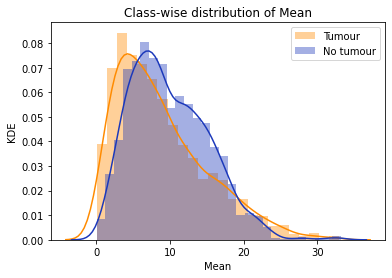

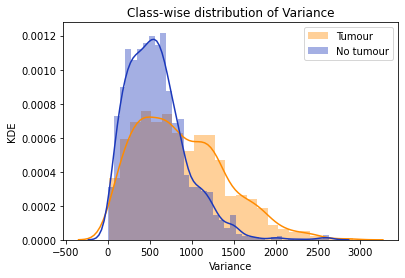

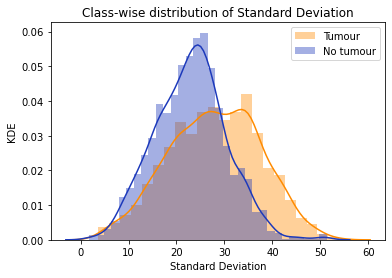

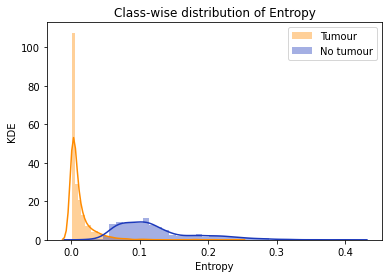

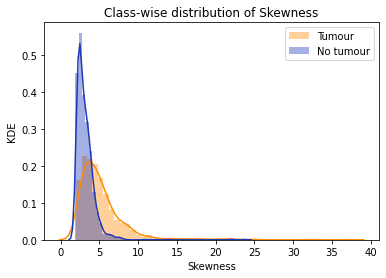

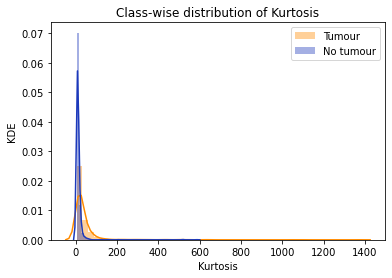

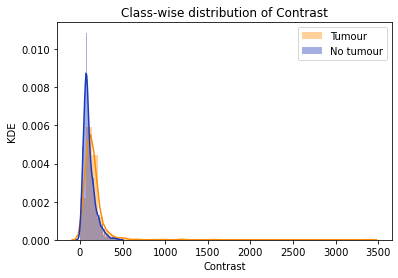

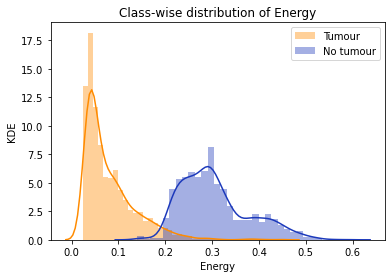

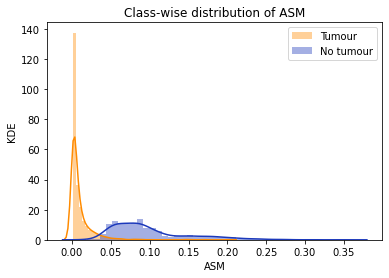

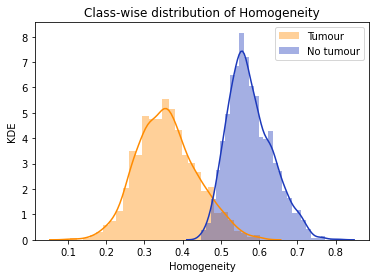

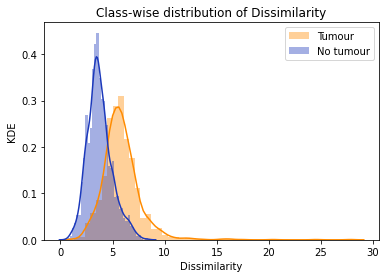

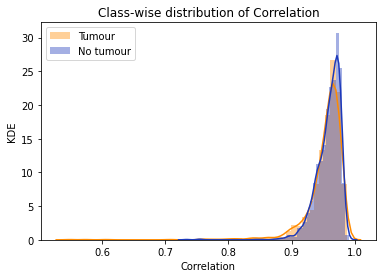

In [28]:
# dataDistroByClass(normal_data)
dataDistroByClass(data)  # kde = True normalises the data

# For KDEs > 1: https://stats.stackexchange.com/questions/4220/can-a-probability-distribution-value-exceeding-1-be-ok

Save normalised data: